# Task 1: CAPM - Object-Oriented

Write a class called "CAPM". The members of the class are: alpha, beta, t-stat of alpha, t-stat of beta, adjusted R^2. The member function "fit_SML(.)" uses the GLS package of the statsmodels to fit the CAPM SML and to pin down alpha, beta, t-stat of alpha, t-stat of beta, adjusted R^2. Also, store the regression package's summary table as a private member of the CAPM class. Let member function "display_Regression_Table(.)" print out the regression summary table.

Test your class on an asset of your choice. How much of the asset's risk is diversifiable and how much is systematatic? Did the asset earn a significant alpha? How large has been the annualized Sharpe Ratio? Compare the average realized return with the SML-implied expected return.

In [106]:
# needed libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [107]:
class CAPM():

    def __init__(self,df):
        self.df = df
        return None

    def fit_SML(self):

        # create the model
        model = sm.gls(formula='log_ret_exc_apple ~ log_ret_exc_sp500', data=self.df)

        # fit the model
        results = model.fit()

        # get reuslts
        self.alpha = results.params[0]
        self.beta = results.params[1]

        self.t_stat_alpha = results.tvalues[0]
        self.t_stat_beta = results.tvalues[1]

        self.alpha_st = results.bse[0]
        self.beta_st = results.bse[1]

        self.adjusted_R = results.rsquared
        self.__summary_table = results.summary()

        self.residuals = results.resid

        self.cov_matrix = results.cov_HC0

        # print(results.cov_HC0)
        # print(results.HC0_se)

        return None

    def display_Regression_Table(self):
        print(self.__summary_table)
        return None

In [108]:
def set_time_index(df, timecolname):

    """This function sets the time col as index and makes sure it's a datetime object.

    :param df: full Dataframe
    :param timecolname: colname of the column that has time information in it
    :return: full Dataframe
    """
    # take the time column and convert it to a datetime object
    df[timecolname] = pd.to_datetime(df[timecolname])

    # set the index of the DF as the time Column
    df.set_index(timecolname, inplace = True)

    return df

In [109]:
# import the needed data
df_apple = pd.read_csv("apple.csv", header = 0, sep = ",")
df_apple = set_time_index(df_apple,"Date")
print(df_apple.head())

df_sp500 = pd.read_csv("sp500.csv", header = 0, sep = ",")
df_sp500 = set_time_index(df_sp500,"Date")
print(df_sp500.head())


df_riskf_annual = pd.read_csv("riskfree.csv", header = 0, sep = ",")
df_riskf_annual = set_time_index(df_riskf_annual,"Date")
print(df_riskf_annual.head())


               Close
Date                
2004-01-02  0.327318
2004-01-05  0.341008
2004-01-06  0.339777
2004-01-07  0.347468
2004-01-08  0.359312
                  Close
Date                   
2004-01-02  1108.479980
2004-01-05  1122.219971
2004-01-06  1123.670044
2004-01-07  1126.329956
2004-01-08  1131.920044
               yld
Date              
2004-01-02  0.0101
2004-01-05  0.0097
2004-01-06  0.0092
2004-01-07  0.0094
2004-01-08  0.0099


               yld  yld_daily
Date                         
2004-01-02  0.0101   0.000040
2004-01-05  0.0097   0.000038
2004-01-06  0.0092   0.000037
2004-01-07  0.0094   0.000037
2004-01-08  0.0099   0.000039
               Close   log_ret  log_ret_exc
Date                                       
2004-01-02  0.327318       NaN          NaN
2004-01-05  0.341008  0.040973     0.040934
2004-01-06  0.339777 -0.003616    -0.003653
2004-01-07  0.347468  0.022383     0.022346
2004-01-08  0.359312  0.033518     0.033479


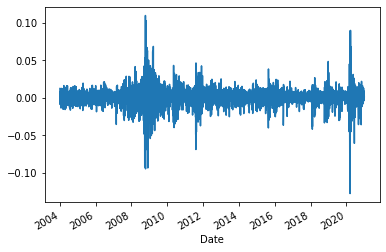

                  Close   log_ret  log_ret_exc
Date                                          
2004-01-02  1108.479980       NaN          NaN
2004-01-05  1122.219971  0.012319     0.012281
2004-01-06  1123.670044  0.001291     0.001255
2004-01-07  1126.329956  0.002364     0.002327
2004-01-08  1131.920044  0.004951     0.004912
            log_ret_exc_apple  log_ret_exc_sp500
Date                                            
2004-01-02                NaN                NaN
2004-01-05           0.040934           0.012281
2004-01-06          -0.003653           0.001255
2004-01-07           0.022346           0.002327
2004-01-08           0.033479           0.004912
...                       ...                ...
2020-12-23          -0.007004           0.000742
2020-12-24           0.007679           0.003527
2020-12-28           0.035137           0.008681
2020-12-29          -0.013408          -0.002233
2020-12-30          -0.008567           0.001337

[4279 rows x 2 columns]


In [110]:
# annualized risk free rate with 252 trading days:
df_riskf_annual["yld_daily"] = df_riskf_annual["yld"] / 252
print(df_riskf_annual.head())

# compute excess log returns: log returns adjusted by provided risk free rate
df_apple['log_ret'] = np.log(df_apple.Close) - np.log(df_apple.Close.shift(1))
df_apple['log_ret_exc'] = df_apple['log_ret'] - df_riskf_annual["yld_daily"]
print(df_apple.head())

df_sp500['log_ret'] = np.log(df_sp500.Close) - np.log(df_sp500.Close.shift(1))
df_sp500['log_ret_exc'] = df_sp500['log_ret'] - df_riskf_annual["yld_daily"]
df_sp500['log_ret_exc'].plot()
plt.show()
print(df_sp500.head())

df_capm = pd.DataFrame()
df_capm["log_ret_exc_apple"] = df_apple["log_ret_exc"]
df_capm["log_ret_exc_sp500"] = df_sp500['log_ret_exc']
print(df_capm)

In [111]:
# sp500 data is a proxy to the market return, apple is the stock to calculate the capm properties

# create the model
capm_apple = CAPM(df_capm)

# fit the model
capm_apple.fit_SML()

In [112]:
# print the regression results
capm_apple.display_Regression_Table()
# P> t => both significant at a 5 % level, even 1 % lvl
# no meaningful positive alpha: alpha very small

                            GLS Regression Results                            
Dep. Variable:      log_ret_exc_apple   R-squared:                       0.365
Model:                            GLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     2461.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        16:59:37   Log-Likelihood:                 11367.
No. Observations:                4278   AIC:                        -2.273e+04
Df Residuals:                    4276   BIC:                        -2.272e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0011      0.00

In [113]:
# Answers for Ps5checker
print(round(capm_apple.alpha,2))
print(round(capm_apple.beta,2))
print(round(capm_apple.t_stat_alpha,2))
print(round(capm_apple.t_stat_beta,2))
print(round(capm_apple.adjusted_R,2))

0.0
1.05
4.27
49.61
0.37


Note: our capm model is based on daily data with excess returns!!

In [114]:
# variance of daily excess returns from apple
variance_excess_daily_apple = df_apple["log_ret_exc"].var()
# print(round(variance_excess_daily_apple,2))

# variance of annual excess returns from apple
df_apple["log_ret_exc_annual"] = df_apple["log_ret_exc"]*252
variance_excess_annual_apple = df_apple["log_ret_exc_annual"].var()
# print(round(variance_excess_annual_apple,2))

# sd of annual excess returns from apple
sd_excess_annual_apple = df_apple["log_ret_exc_annual"].std()
# print(round(sd_excess_annual_apple,2))

print("_"*20)

____________________


In [115]:
# variance of daily excess returns from sp500
variance_excess_daily_sp500 = df_sp500["log_ret_exc"].var()
df_sp500["log_ret_exc_annual"] = df_sp500["log_ret_exc"]*252
# print(round(variance_excess_daily_sp500,2))

# variance of annual excess returns from sp500
variance_excess_annual_sp500 = df_sp500["log_ret_exc_annual"].var()
# print(round(variance_excess_annual_sp500,2))
# print(round(variance_excess_annual_sp500 * capm_apple.beta**2,2))

# sd of annual excess returns from sp500
sd_excess_annual_sp500 = df_sp500["log_ret_exc_annual"].std()
# print(round(sd_excess_annual_sp500,2))

# print(round(np.sqrt(variance_excess_annual_sp500 * capm_apple.beta**2),2))

print("_"*20)

____________________


In [116]:
variance_resid_excess_daily = variance_excess_daily_apple - (capm_apple.beta**2 * variance_excess_daily_sp500)
# print(round(variance_resid_excess_daily,2))

variance_resid_excess_annual = variance_excess_annual_apple - (capm_apple.beta**2 * variance_excess_annual_sp500)
print(round(variance_resid_excess_annual,2))

sd_resid_excess_annual = np.sqrt(variance_resid_excess_annual)
print(round(sd_resid_excess_annual,2))
print("_"*20)

18.3
4.28
____________________


In [117]:
# helper_df = pd.DataFrame()
# helper_df["log_ret_apple_annual"] = df_apple["log_ret"] * 252
# helper_df["log_ret_exc_apple_annual"] = df_apple['log_ret_exc']* 252
# helper_df["yld_annual"] = df_riskf_annual["yld_daily"] * 252
# print(round(helper_df["log_ret_apple_annual"].std(),2))
# print(round(helper_df["log_ret_exc_apple_annual"].std(),2))
# print(helper_df["yld_annual"].var())
# print(helper_df.cov())

In [118]:
print(round(sd_resid_excess_annual / sd_excess_annual_apple,2))
print(round(round(np.sqrt(variance_excess_annual_sp500 * capm_apple.beta**2),2)/sd_excess_annual_apple,2))



0.8
0.61


In [119]:
# get the total risk
# helper_df = pd.DataFrame()
# helper_df["log_ret_apple"] = df_apple["log_ret"]
# helper_df["log_ret_sp500"] = df_sp500['log_ret']
# total_risk_annualized = helper_df.cov() * 252
# total_risk_annualized = total_risk_annualized.iloc[0,0]
# print("total annualized variance")
# print(round(total_risk_annualized,2))
# print("total annualized sd")
# print(round(np.sqrt(total_risk_annualized),2))
# var_resid = total_risk_annualized - (capm_apple.beta**2 * capm_apple.beta_st **2)  * 252
# print("residual annualized variance")
# print(var_resid)
# print("market annualized variance")
# print((capm_apple.beta**2 * capm_apple.beta_st **2) * 252)
# idiosyncratic_risk_annualized = np.sqrt((capm_apple.beta**2 * capm_apple.beta_st **2) * 252)
# systematic_risk_annualized = np.sqrt(var_resid)
# diversifiable_risk = idiosyncratic_risk_annualized / total_risk_annualized
# non_diversifiable_risk = systematic_risk_annualized / total_risk_annualized
# print(round(idiosyncratic_risk_annualized,2))
# print(round(systematic_risk_annualized,2))
# print(round(diversifiable_risk,2))
# print(round(non_diversifiable_risk,2))

In [123]:
annualized_average_excess_log_return = df_apple["log_ret_exc_annual"].mean()
# print(round(df_apple['log_ret_exc'].mean() * 252,2))
# print(round(annualized_average_excess_log_return,2))

# not quite sure, but gess also excess returns, note alpha, denoting r is very small, as in fact it shouldn't be there
# uj = r + (um -r) *bj <=> uj-r = (um-r) * bj
print(round(df_sp500['log_ret_exc'].mean() * 252,2))
print(round(df_sp500['log_ret'].mean() * 252 ,4))
annualized_sMl_implied_expected_return = capm_apple.alpha + capm_apple.beta * df_sp500['log_ret_exc'].mean() * 252
# print(round(annualized_sMl_implied_expected_return,2))

sr_annualized = annualized_average_excess_log_return / sd_excess_annual_apple
# print(round(sr_annualized,2))

0.06
0.0715


----------------------------------------------------------------------------------------------


# try
total risk
total risk of asset apple = beta^2 marketrisk^2 + residrisk^2 (in terms of variance)

with beta^2 marketrisk = systematik risk, non_diversifiable
with residrisk = specific asset risk, idiosyncratic, diversifiable


with marketrisk being the std err of log_ret_exc_sp500